# Exemple - Quadrotor Mathematical Environment - v1

Hello! 
This is an example of the algorithm usage. 

The main file we are going to use is ./quadrotor_env.py
You should also download ./quaternion_euler_utility.py, as it is a file with auxiliary functions. 

Firt thing we need to do is to initialize the quadrotor class:

    t_step - Integration timestep
    n - Maximum number of steps

In [19]:
import numpy as np
from quadrotor_env import quad

t_step = 0.01
n = 2000
quad = quad(t_step, n, direct_control=1)


Two of the most usefull funcions of the class are the following:
    
        self.reset() - Resets the environment to its initial state
        self.step(action) - Runs the algorithm one step foward in time

The reset function is self explanatory, the system returns to its original state, being actuated by a neutral action. 

Every time self.step(action) is called, the function returns the systems state after the action, the reward of that action andif the environment has reached terminal state.

If the environment is at terminal state, the user should reset the environment by calling self.reset().

This following example we are able to observe the step function outputs.

In [20]:
import numpy as np
from quadrotor_env import quad, plotter

t_step = 0.01
n = 2
quad = quad(t_step, n, direct_control=1)
print(quad.reset())

done = False

while not done:
    action = np.array([0, 0, 0, 0])
    state, reward, done = quad.step(action)
    print(state, reward, done)


(array([[-1.2454767 , -0.19618656, -1.18656911,  0.22579936,  2.27055809,
         0.15940023,  0.98814599, -0.03256789,  0.10405566,  0.10807059,
         0.00892091, -0.02903512, -0.1482753 ,  0.05244821]]), array([[0., 0., 0., 0.]]))
[[-1.24734151 -0.17682579 -1.18426847  0.23433593  2.27214048  0.15708701
   0.98823396 -0.03285776  0.10257272  0.10859489  0.00867229 -0.02893869
  -0.14831113  0.05241098]] 0.06323790630291626 False
[[-1.2490142  -0.15776166 -1.18188228  0.24290756  2.27370001  0.15482979
   0.98831944 -0.03314666  0.10108943  0.10911881  0.00842367 -0.02884218
  -0.14834647  0.05237375]] 0.05103009316690077 True


Some useful parameters:

    System's States (pos, vel, quat, vel ang) - self.state
    System's rotational matrix - self.mat_rot
    Inertial Forces applied to the system - self.f_inertial
    Inertial Acceleration of the system - self.accel
    Proppeler angular velocity - self.w
    Terminal Condition - self.done
    Euler Angles - self.ang

By default the reset function resets the system to a random initial state. You may also feed in the initial state in the reset funcion, as follows:

In [21]:
import numpy as np
from quadrotor_env import quad, plotter

t_step = 0.01
n = 2
quad = quad(t_step, n, direct_control=1)

env_in = np.array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])
print(quad.reset(env_in))

done = False

while not done:
    action = np.array([0, 0, 0, 0])
    state, reward, done = quad.step(action)
    print(state, reward, done)


(array([[1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0.]]))
[[1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] 0.0 False
[[1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] 0.0 True


## Plotting Environment

A plotting environment was also developed. Firstly it is necessary to declare the class and feed the mathematical simulation object to it. 

In [22]:
from quadrotor_env import plotter
quad_plot = plotter(quad)

<Figure size 432x288 with 0 Axes>

An example of the plotter environment:

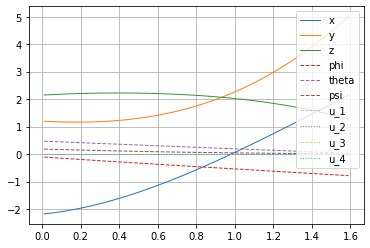

In [23]:
import numpy as np
from quadrotor_env import quad, plotter

t_step = 0.01
n = 2000
quad = quad(t_step, n, direct_control=1)
quad_plot = plotter(quad)
states, _ = quad.reset()
quad_plot.add()
done = False

while not done:
    action = np.array([0, 0, 0, 0])
    states, _, done = quad.step(action)
    quad_plot.add()
quad_plot.plot()

Enabling depth_plot=True it is possible to visualize a 3D representation of the trajectory.

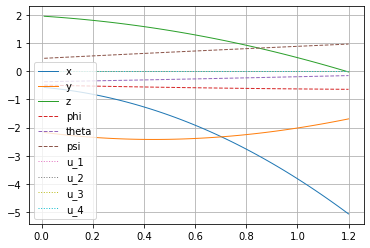

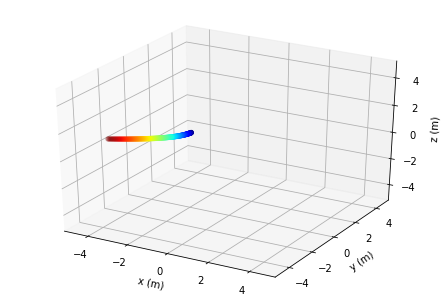

In [24]:
import numpy as np
from quadrotor_env import quad, plotter

t_step = 0.01
n = 2000
quad = quad(t_step, n, direct_control=1)
quad_plot = plotter(quad, depth_plot=True)
states, _ = quad.reset()
quad_plot.add()
done = False

while not done:
    action = np.array([0, 0, 0, 0])
    states, _, done = quad.step(action)
    quad_plot.add()
quad_plot.plot()

## Sensing Environment

A sensing environment was also developed. This environment is capable of simulating real on board sensors, using popular attitude estimation methods and numerical integration.

Initializing the class:

In [25]:
from quadrotor_env import quad, sensor


t_step = 0.01
n = 5
quad_sens = sensor(quad)

To use the position estimation based on the on board accelerometer, it is necessary to call self.accel_int() **every** iteration, the function outputs acceleration, velocity and position of the quadrotor, estimated by the accelerometer and integration algorithm.


In [26]:
from quadrotor_env import quad, sensor

t_step = 0.01
n = 5
quad = quad(t_step, n, direct_control=1)
quad_sens = sensor(quad)

states, _ = quad.reset()
quad_sens.reset()

done = False

while not done:
    action = np.array([0, 0, 0, 0])
    states, _, done = quad.step(action)
    accel, vel, pos = quad_sens.accel_int()
    print(pos, states[0][0:5:2])

[-0.7037868   1.21203036  1.21322352] [-0.70353707  1.212056    1.21330024]
[-0.70068817  1.22405538  1.20715629] [-0.70017529  1.22407539  1.20731049]
[-0.69807472  1.23598591  1.20095915] [-0.69730373  1.23599592  1.20118632]
[-0.69594036  1.24775169  1.19463704] [-0.69492061  1.24781415  1.19492829]
[-0.69428647  1.25945241  1.1881962 ] [-0.6930241   1.25952668  1.18853698]


Similarly with the gyroscope, the function ouputs angular velocity and attitude (both in quaternions).

In [27]:
from quadrotor_env import quad, sensor

t_step = 0.01
n = 5
quad = quad(t_step, n, direct_control=1)
quad_sens = sensor(quad)

states, _ = quad.reset()
quad_sens.reset()

done = False

while not done:
    action = np.array([0, 0, 0, 0])
    states, _, done = quad.step(action)
    q = quad_sens.gyro_int()
    print(q, states[0][-8:-4])

[ 0.98114934 -0.18190574 -0.02951218 -0.0582355 ] [ 0.98114944 -0.1819015  -0.02943123 -0.058236  ]
[ 0.98116021 -0.18252279 -0.03013862 -0.05575533] [ 0.98115584 -0.18258053 -0.02957628 -0.05588213]
[ 0.98117664 -0.18314252 -0.03030292 -0.05328662] [ 0.98115662 -0.18325666 -0.0297231  -0.05352783]
[ 0.98112164 -0.18399295 -0.0304776  -0.05121613] [ 0.98115177 -0.18392986 -0.02987169 -0.05117312]
[ 0.98110089 -0.18457063 -0.03107134 -0.0491356 ] [ 0.98114131 -0.18460012 -0.03002204 -0.04881801]


There is algo a GPS estimation method, using self.gps():

In [28]:
from quadrotor_env import quad, sensor

t_step = 0.01
n = 5
quad = quad(t_step, n, direct_control=1)
quad_sens = sensor(quad)

states, _ = quad.reset()
quad_sens.reset()

done = False

while not done:
    action = np.array([0, 0, 0, 0])
    states, _, done = quad.step(action)
    pos, vel = quad_sens.gps()
    print(pos, states[0][0:5:2])

[-1.76511705 -3.58613072 -0.19786966] [-0.74731096 -2.42052343 -0.74974484]
[-2.53881656 -1.30169254 -1.96567369] [-0.75437106 -2.41203171 -0.74701348]
[-2.62907939 -2.48594596 -2.32069714] [-0.7617484  -2.40366289 -0.74434346]
[ 1.78768742 -2.52016114 -0.49993467] [-0.76944661 -2.3954151  -0.74173583]
[-5.16336636 -1.0716106  -1.6469821 ] [-0.77746937 -2.38728649 -0.73919165]


There is also a TRIAD algorithm, based on the magnetic and gravity vector, as read by the on board sensors. This algorithm is usefull to extract the quadrotor rotational matrix.

In [29]:
from quadrotor_env import quad, sensor

t_step = 0.01
n = 3
quad = quad(t_step, n, direct_control=1)
quad_sens = sensor(quad)

states, _ = quad.reset()
quad_sens.reset()

done = False

while not done:
    action = np.array([0, 0, 0, 0])
    states, _, done = quad.step(action)
    q, R = quad_sens.triad()
    print('Estimation: ')
    print(R)
    print('Real: ')
    print(quad.mat_rot)

Estimation: 
[[ 0.88402311  0.32058862  0.34018535]
 [-0.17584173  0.90237615 -0.39344247]
 [-0.43310832  0.28799345  0.85409423]]
Real: 
[[ 0.87347206  0.37631764  0.30892004]
 [-0.23808829  0.88360357 -0.40318569]
 [-0.42468874  0.2786212   0.86139985]]
Estimation: 
[[ 0.76486373  0.61749387  0.18353419]
 [-0.47415413  0.73250391 -0.48848325]
 [-0.43607492  0.28659963  0.85305294]]
Real: 
[[ 0.87381393  0.3748904   0.3096876 ]
 [-0.23690318  0.8843932  -0.40215115]
 [-0.42464821  0.2780393   0.86160782]]
Estimation: 
[[ 0.82636084  0.50988618  0.23904778]
 [-0.37666487  0.81601302 -0.43845904]
 [-0.41863031  0.27228448  0.86637742]]
Real: 
[[ 0.87415414  0.37346175  0.31045266]
 [-0.23571793  0.88518021 -0.40111477]
 [-0.42460758  0.27745688  0.86181558]]


The sensors parameters are changeable:
    
        accel_std - Accelerometer Standard Deviation
        accel_bias_drift - Accelerometer Bias Drift
        gyro_std - Gyroscope Standard Deviation
        gyro_bias_drift - Gyroscope Bias Drift
        magnet_std - Magnetometer Standard Deviation
        magnet_bias_drift - Magnetometer Bias Drift
        gps_std_p - GPS position Standard Deviation
        gps_std_v - GPS velocity Standard Deviation
    
    